In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import nibabel as nib
import numpy as np


data_dir = '/content/drive/MyDrive/MSc/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN'
patient_dirs = [f.path for f in os.scandir(data_dir) if f.is_dir()]
patient_dirs = sorted(patient_dirs)

num_patients = 3
patient_count = 0


for patient_dir in patient_dirs:
   
    patient_id = os.path.basename(patient_dir)[:7]
    pet_scan_path = os.path.join(patient_dir, f"{patient_id}_PT_partition.nii")
    mask_path = os.path.join(patient_dir, f"{patient_id}_PT_mask.nii")

    pet_scan = nib.load(pet_scan_path)
    mask = nib.load(mask_path)

    voxel_size = pet_scan.header.get_zooms()

    pet_scan_data = pet_scan.get_fdata()
    mask_data = mask.get_fdata()

    mask_volume = np.sum(mask_data == 1) * voxel_size[0] * voxel_size[1] * voxel_size[2] / 1000

    print(f"Patient {patient_id} mask volume: {mask_volume:.2f} cm^3")

    patient_count += 1
    if patient_count == num_patients:
        break


Patient LCp0001 mask volume: 7.45 cm^3
Patient LCp0002 mask volume: 5.42 cm^3
Patient LCp0003 mask volume: 7.87 cm^3


In [5]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

def plot_ct_with_mask(ct_scan_path, ct_mask_path):
    # Load the CT scan and mask data
    ct_scan = nib.load(ct_scan_path)
    ct_mask = nib.load(ct_mask_path)

    # Extract the data arrays from the loaded NIfTI files
    ct_scan_data = ct_scan.get_fdata()
    ct_mask_data = ct_mask.get_fdata()

    # Find the slice index with the mass
    mass_slice_indices = np.where(ct_mask_data > 0)
    slice_index = mass_slice_indices[2][0]  # Select the first slice with a mass

    # Get the slice from the CT scan and mask data
    ct_slice = ct_scan_data[:, :, slice_index]
    mask_slice = ct_mask_data[:, :, slice_index]

    # Rotate the slices 90 degrees to the left
    ct_slice = rotate(ct_slice, 90)
    mask_slice = rotate(mask_slice, 90)

    # Create the plot
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the CT scan slice
    axes[0].imshow(ct_slice, cmap='gray')
    axes[0].set_title('CT Scan')

    # Plot the CT mask overlay
    axes[1].imshow(ct_slice, cmap='gray')
    axes[1].imshow(mask_slice, cmap='jet', alpha=0.5)
    axes[1].set_title('CT Mask Overlay')

    # Remove ticks and labels from the plot
    for ax in axes:
        ax.axis('off')

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1)

    # Display the plot
    plt.show()


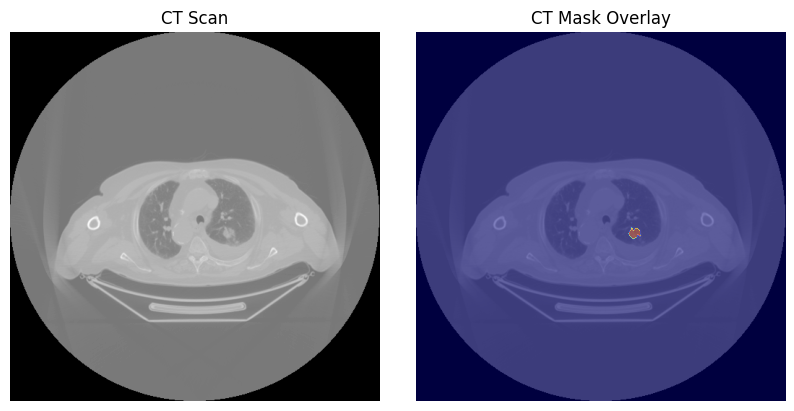

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib


# Load the PET scan and the mask for the first patient
patient_folder = 'LCp0003_biobank'
patient_file = 'LCp0003'
ct_scan_path = f'/content/drive/MyDrive/MSc/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/{patient_folder}/{patient_file}_CT_partition.nii'
ct_mask_path = f'/content/drive/MyDrive/MSc/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/{patient_folder}/{patient_file}_CT_mask.nii'


plot_ct_with_mask(ct_scan_path, ct_mask_path)


In [10]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

def plot_ct_pet_with_mask(ct_scan_path, ct_mask_path, pet_scan_path, pet_mask_path):
    # Load the CT scan and mask data
    ct_scan = nib.load(ct_scan_path)
    ct_mask = nib.load(ct_mask_path)

    # Load the PET scan and mask data
    pet_scan = nib.load(pet_scan_path)
    pet_mask = nib.load(pet_mask_path)

    # Extract the data arrays from the loaded NIfTI files
    ct_scan_data = ct_scan.get_fdata()
    ct_mask_data = ct_mask.get_fdata()

    pet_scan_data = pet_scan.get_fdata()
    pet_mask_data = pet_mask.get_fdata()

    # Find the slice index with the mass for CT scan
    ct_mass_slice_indices = np.where(ct_mask_data > 0)
    ct_slice_index = ct_mass_slice_indices[2][0]  # Select the first slice with a mass

    # Find the slice index with the mass for PET scan
    pet_mass_slice_indices = np.where(pet_mask_data > 0)
    pet_slice_index = pet_mass_slice_indices[2][0]  # Select the first slice with a mass

    # Get the slices from the CT scan and mask data
    ct_slice = ct_scan_data[:, :, ct_slice_index]
    ct_mask_slice = ct_mask_data[:, :, ct_slice_index]

    # Get the slices from the PET scan and mask data
    pet_slice = pet_scan_data[:, :, pet_slice_index]
    pet_mask_slice = pet_mask_data[:, :, pet_slice_index]

    # Rotate the slices 90 degrees to the left
    ct_slice = rotate(ct_slice, 90)
    ct_mask_slice = rotate(ct_mask_slice, 90)
    pet_slice = rotate(pet_slice, 90)
    pet_mask_slice = rotate(pet_mask_slice, 90)

    # Create the plot
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    # Plot the CT scan slice with mask overlay
    axes[0, 0].imshow(ct_slice, cmap='gray')
    axes[0, 0].imshow(ct_mask_slice, cmap='jet', alpha=0.5)
    axes[0, 0].set_title('CT Scan with Mask Overlay')

    # Plot the CT scan slice without mask overlay
    axes[0, 1].imshow(ct_slice, cmap='gray')
    axes[0, 1].set_title('CT Scan')

    # Plot the PET scan slice with mask overlay
    axes[1, 0].imshow(pet_slice, cmap='hot')
    axes[1, 0].imshow(pet_mask_slice, cmap='jet', alpha=0.5)
    axes[1, 0].set_title('PET Scan with Mask Overlay')

    # Plot the PET scan slice without mask overlay
    axes[1, 1].imshow(pet_slice, cmap='hot')
    axes[1, 1].set_title('PET Scan')

    # Remove ticks and labels from the plot
    for ax in axes.flatten():
        ax.axis('off')

    # Adjust the spacing between subplots
    plt.subplots_adjust(wspace=0.1, hspace=0.2)

    # Display the plot
    plt.show()


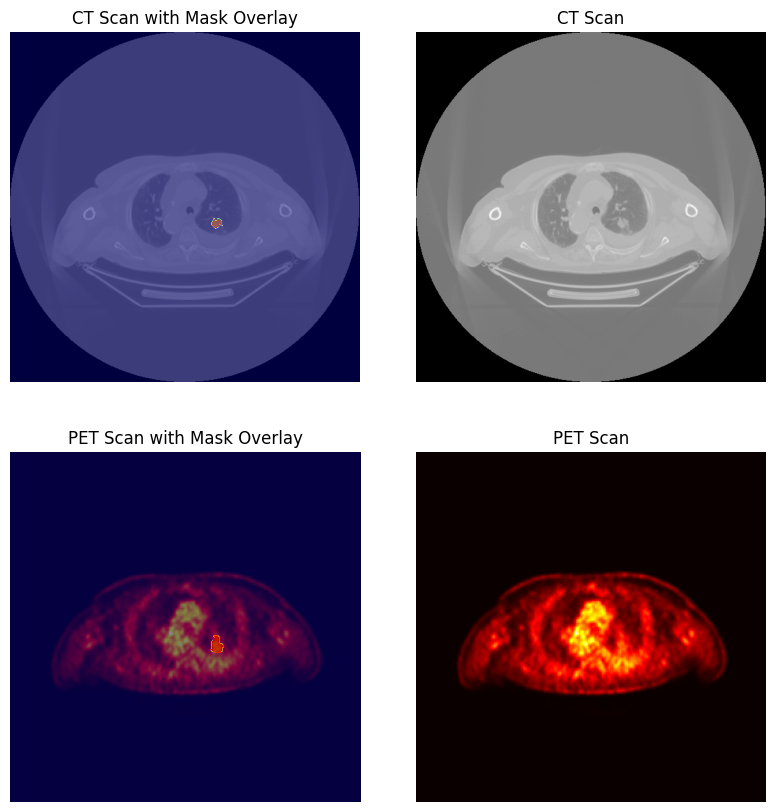

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib


# Load the PET scan and the mask for the first patient
patient_folder = 'LCp0003_biobank'
patient_file = 'LCp0003'
ct_scan_path = f'/content/drive/MyDrive/MSc/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/{patient_folder}/{patient_file}_CT_partition.nii'
ct_mask_path = f'/content/drive/MyDrive/MSc/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/{patient_folder}/{patient_file}_CT_mask.nii'
pet_scan_path = f'/content/drive/MyDrive/MSc/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/{patient_folder}/{patient_file}_PT_partition.nii'
pet_mask_path = f'/content/drive/MyDrive/MSc/Healthcare/Project no. 2 - PET-CT/Castiglioni_masse_polmonari_laboratorio/CLASS2_BENIGN/{patient_folder}/{patient_file}_PT_mask.nii'


plot_ct_pet_with_mask(ct_scan_path, ct_mask_path, pet_scan_path, pet_mask_path)